In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
sample = np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9])
sample

array([ 15, 101,  18,   7,  13,  16,  11,  21,   5,  15,  10,   9])

In [5]:
def measures(data):
    print("Mean: ", data.mean())
    print("Median: ", np.median(data))
    print("Mode: ", stats.mode(data)[0])
    print("Variance: ", np.var(data))
    print("Std dev: ", np.std(data))
measures(sample)

Mean:  20.083333333333332
Median:  14.0
Mode:  15
Variance:  614.7430555555555
Std dev:  24.794012494059036


In [7]:
x = np.delete(sample, np.where(sample==101)) # copy the sample array to x without the outlier
measures(x)

Mean:  12.727272727272727
Median:  13.0
Mode:  15
Variance:  21.28925619834711
Std dev:  4.614028196527099


Skewness:  2.8446757484796286


C:\Users\boopa\AppData\Local\Temp\ipykernel_5448\2517885185.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample, kde=True)


Text(0.5, 0, 'Sample')

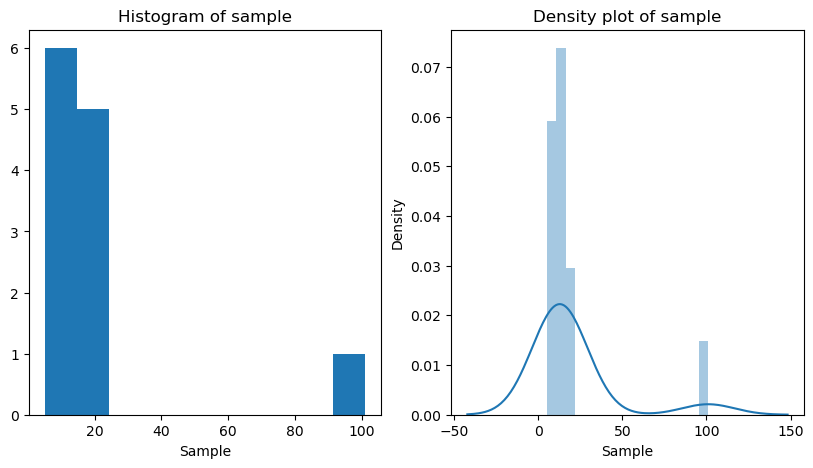

In [9]:
# with outlier
print("Skewness: ", stats.skew(sample))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(sample)
plt.title("Histogram of sample")
plt.xlabel('Sample')
plt.subplot(1,2,2)
sns.distplot(sample, kde=True)
plt.title('Density plot of sample')
plt.xlabel('Sample')

Skewness:  0.041485935980599055


C:\Users\boopa\AppData\Local\Temp\ipykernel_5448\3816933941.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=True)


Text(0.5, 0, 'x')

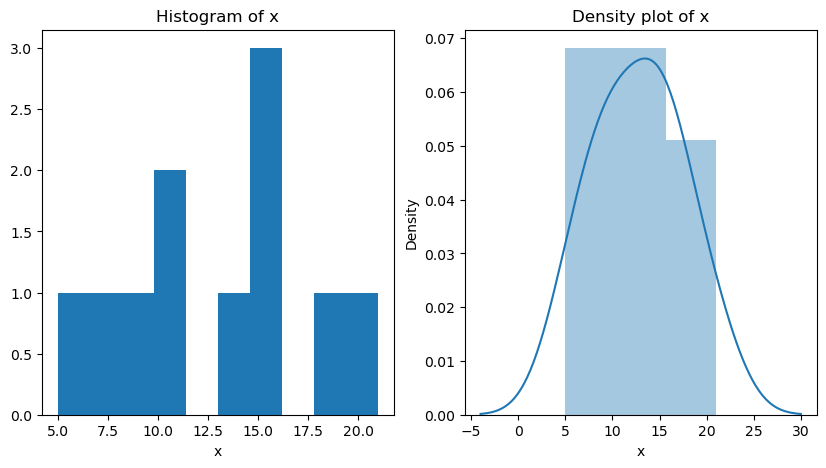

In [11]:
# without outlier
print("Skewness: ", stats.skew(x))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(x)
plt.title("Histogram of x")
plt.xlabel('x')
plt.subplot(1,2,2)
sns.distplot(x, kde=True)
plt.title('Density plot of x')
plt.xlabel('x')

Text(0.5, 0, 'Sample')

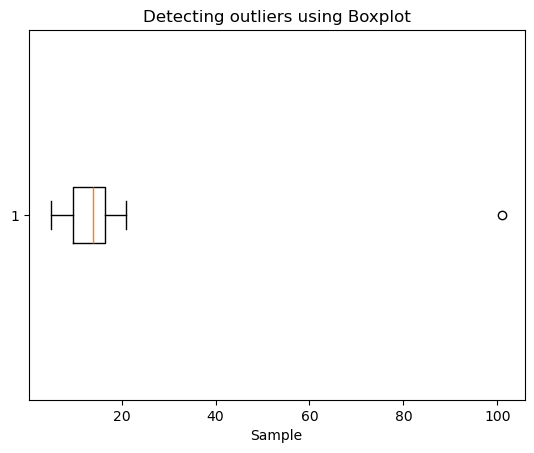

In [13]:
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [15]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [101]


In [17]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [101]


In [19]:
# Trimming
# here sample_outliers = [101]
for i in sample_outliers:
    a = np.delete(sample, np.where(sample==i)) # removing the outlier and copying the rest of the elements to 'a'
print(a)
# print(len(sample), len(a))

[15 18  7 13 16 11 21  5 15 10  9]


In [29]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("New array:",b)

New array: [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


In [23]:
median = np.median(sample)
median

14.0

In [25]:
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  [ 15 101  18   7  13  16  11  21   5  15  10   9]
New array:  [15 14 18  7 13 16 11 21  5 15 10  9]


Text(0.5, 0, 'Sample')

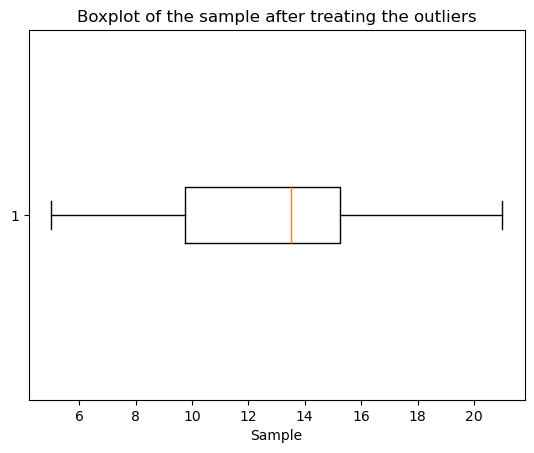

In [27]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")